### Lets take a look at the DataFrame to get an idea of what sort of data we are dealing with (EDA: Exploratory data analysis)

In [3]:
import os
for dirname, _, filenames in os.walk('/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/Baseball Case study.ipynb
/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/baseball.csv
/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/First-Phase-Evaluation-Projects--2-.docx
/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/.ipynb_checkpoints/Baseball Case study-checkpoint.ipynb


In [4]:
# Let's look at the structure of the DataFrame

import pandas as pd

train_data_file_path = '/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/baseball.csv'
train_data = pd.read_csv(train_data_file_path)
train_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
# Showing summary statistics

train_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
# Checking the dataset for missing values

Is_there_missing_data = train_data.isnull().any().any()
Is_there_missing_data

False

In [7]:
# checking for total amount of rows and columns

train_data.shape

(30, 17)

In [8]:
# datatypes in this dataframe

train_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

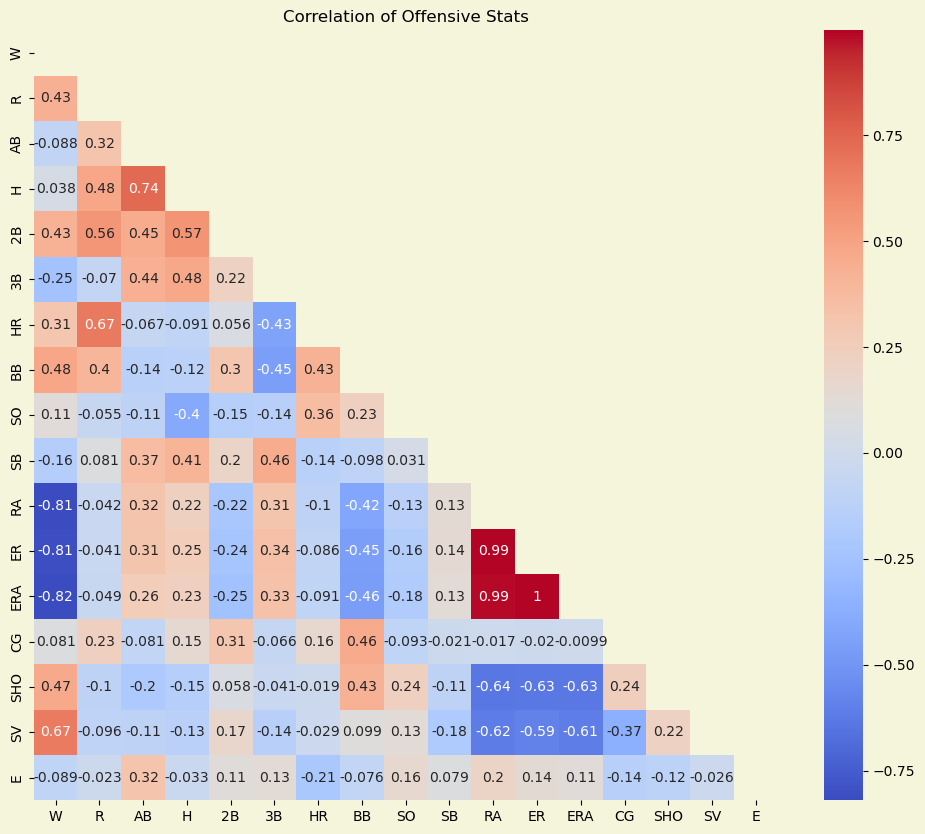

In [10]:
# Let's breakout and analyze the offensive statistics 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

offensive_stats = train_data[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]

# Scale features and convert back to a DataFrame
scaler = StandardScaler()
offensive_stats = scaler.fit_transform(offensive_stats)
offensive_stats = pd.DataFrame(offensive_stats, columns=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'])


fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
plt.title('Correlation of Offensive Stats')

# Caluclate the Pearson correlation bewetween all variables
cor = offensive_stats.corr()

# Only display the bottom triangle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=plt.cm.coolwarm)
plt.show()

#### Because the dependent variable here (E) is dichotomous and the independent variables are continous, let's verify the correlation coeeficient calculated above, but this time using point-biserial correlation

In [12]:
# Let's calculate the point-biserial correlation and associated P-values

from scipy import stats

# Calculate point-biserial correlations with E and store p-values
correlations = {}

for column in offensive_stats.columns[:-1]:  # Exclude WS_Win from the loop
    r_pb, p_value = stats.pointbiserialr(offensive_stats[column], offensive_stats['E'])
    correlations[column] = {'Point-Biserial Correlation': r_pb, 'P-Value': p_value}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index')

# Sort the DataFrame by P-value in descending order
correlations_df = correlations_df.sort_values(by='P-Value', ascending=True)

print(correlations_df)

     Point-Biserial Correlation   P-Value
AB                     0.316743  0.088123
HR                    -0.207597  0.270989
RA                     0.198996  0.291782
SO                     0.155133  0.413033
CG                    -0.140047  0.460440
ER                     0.136921  0.470609
3B                     0.126678  0.504735
SHO                   -0.115716  0.542577
ERA                    0.113137  0.551669
2B                     0.105754  0.578081
W                     -0.089485  0.638179
SB                     0.079149  0.677595
BB                    -0.075685  0.690999
H                     -0.033173  0.861846
SV                    -0.025636  0.893029
R                     -0.023262  0.902889


<Axes: >

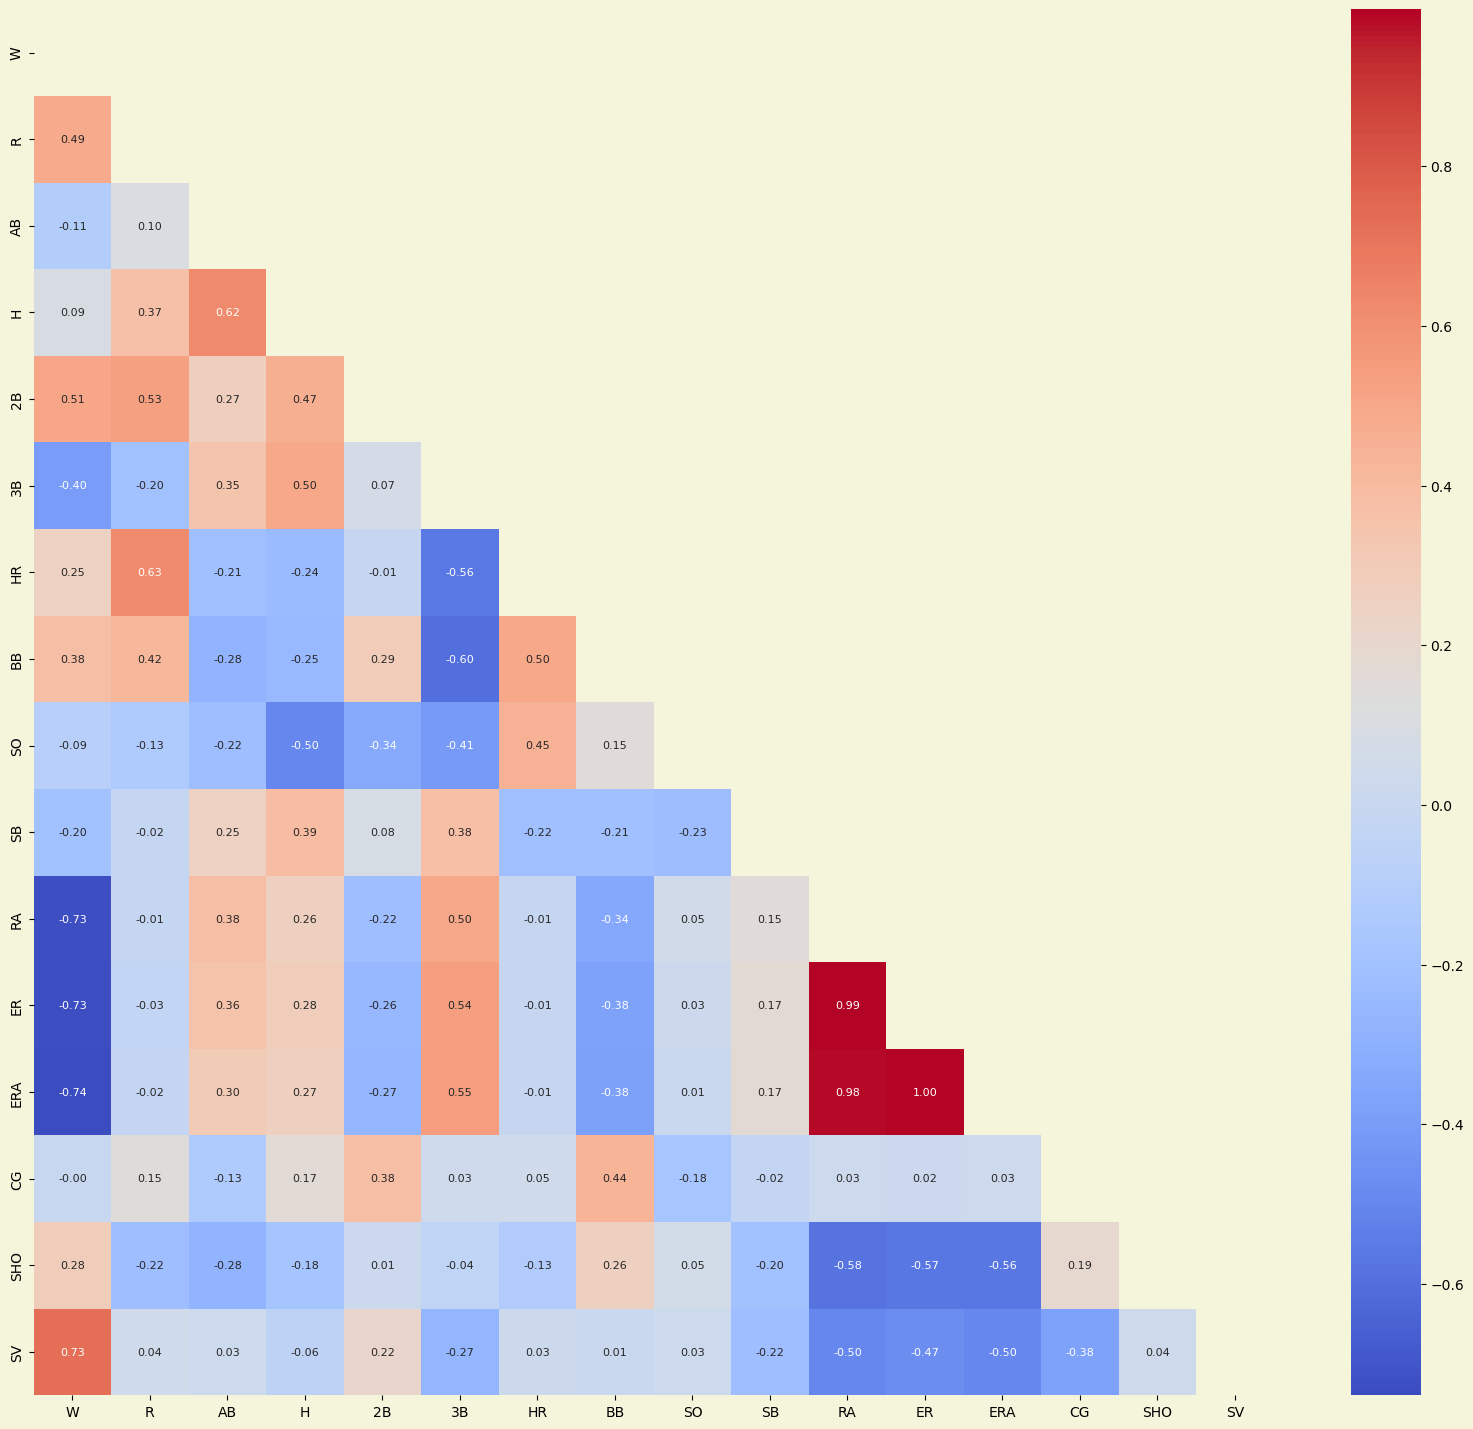

In [14]:
from sklearn.model_selection import train_test_split

# Create a new DataFrame that includes only the independent variables
features = train_data.drop(['E'], axis=1)
column_names = features.columns

# Create a ne DataFrame consisting of just the target variable
target = train_data['E']

# Create train_test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Scale the data
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=column_names)

# Calculate and plot a correlation matrix using a heatmap
cor = X_train.corr()

# Create a mask to display only the lower half of the matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 18))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Create a heatmap
sns.heatmap(
    cor,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    square=False,
    cbar=True,
    annot_kws={"size": 8},
)


<Axes: >

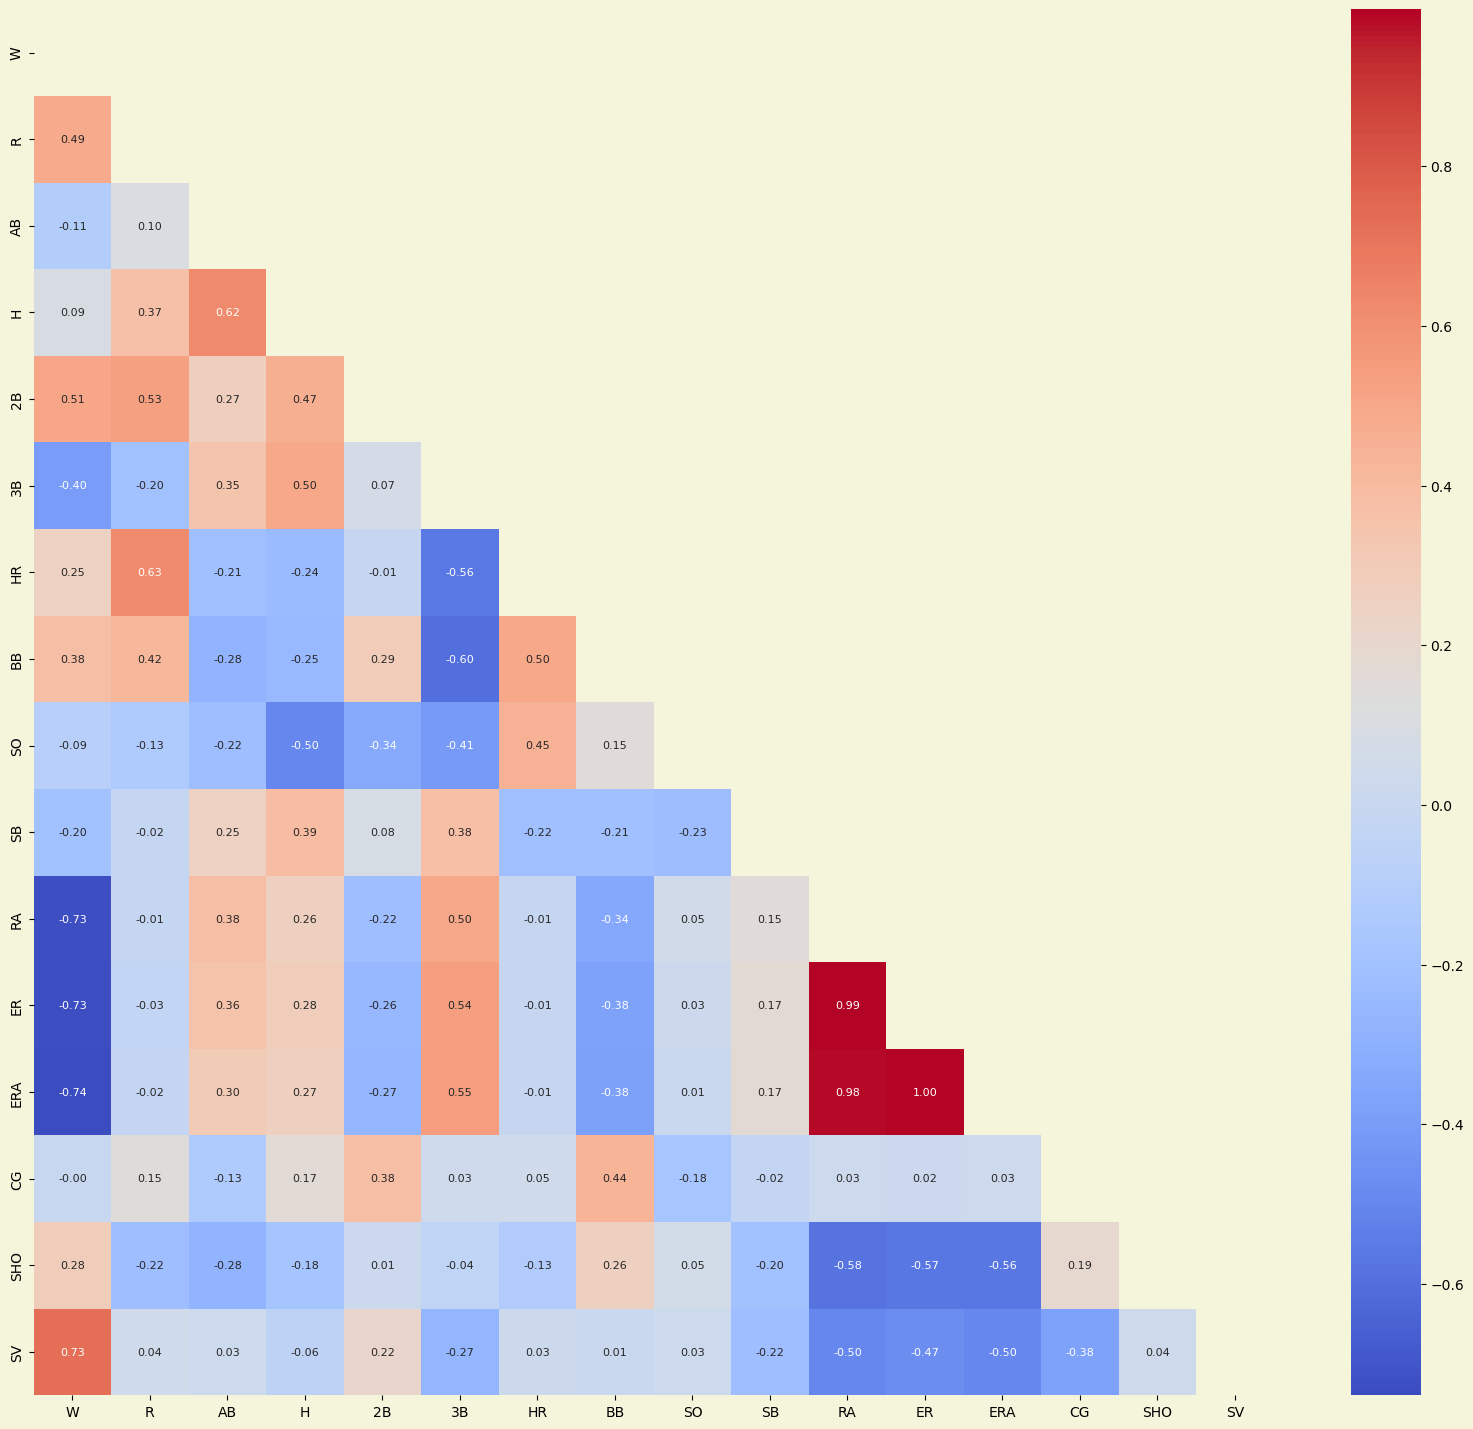

In [16]:
# Let's keep a DataFrame with all of the features to train the random forest and SVM classifier models
X_train_rf_svm = X_train

# Create a DataFrame of the statistically significant features for the logistic regression model
X_train = X_train[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV']]

# Calculate and plot a correlation matrix using a heatmap
cor = X_train.corr()

# Create a mask to display only the lower half of the matrix
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 18))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Create a heatmap
sns.heatmap(
    cor,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    square=False,
    cbar=True,
    annot_kws={"size": 8},
)

### Model Selection

In [17]:
# Let's create an initial Logistic Regression model

from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
# Let's create an initial Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# Train a random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf_svm, y_train)

# Implement Platt scaling 
rf_model_platt = CalibratedClassifierCV(rf_model, method='sigmoid')
rf_model_platt.fit(X_train_rf_svm, y_train)